# Description

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.
This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.


 By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.
prefix 't' in those metrics denotes time.
suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.


# Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 
2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
In our dataset, each datapoint represents a window with different readings
3. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz. 
4. After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 
5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag. 
6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMagetc.,.
7. These are the signals that we got so far.
   •	tBodyAcc-XYZ 
   •	tGravityAcc-XYZ 
   •	tBodyAccJerk-XYZ 
   •	tBodyGyro-XYZ 
   •	tBodyGyroJerk-XYZ 
   •	tBodyAccMag
   •	tGravityAccMag
   •	tBodyAccJerkMag
   •	tBodyGyroMag
   •	tBodyGyroJerkMag
   •	fBodyAcc-XYZ 
   •	fBodyAccJerk-XYZ 
   •	fBodyGyro-XYZ 
   •	fBodyAccMag
   •	fBodyAccJerkMag
   •	fBodyGyroMag
   •	fBodyGyroJerkMag
8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.
mean(): Mean value 
std(): Standard deviation 
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array 
sma(): Signal magnitude area 
energy(): Energy measure. Sum of the squares divided by the number of values. iqr(): Interquartile range 
entropy(): Signal entropy 
arCoeff():Autorregresion coefficients with Burg order equal to 4 
correlation(): correlation coefficient between two signals 
maxInds(): index of the frequency component with largest magnitude 
meanFreq(): Weighted average of the frequency components to obtain a mean frequency 
skewness():skewness of the frequency domain signal 
kurtosis(): kurtosis of the frequency domain signal 
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window. 
angle(): Angle between to vectors. 
9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable' `
•	gravityMean
•	tBodyAccMean
•	tBodyAccJerkMean
•	tBodyGyroMean
•	tBodyGyroJerkMean
Y_Labels(Encoded): In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers. 
WALKING as 1 
WALKING_UPSTAIRS as 2 
WALKING_DOWNSTAIRS as 3 
SITTING as 4 
STANDING as 5 
LAYING as 6



# Datasets

Data All the data is present in 'UCI_HAR_dataset/' folder in present working directory. 
•Feature names are present in 'UCI_HAR_dataset/features.txt' 
•Train Data 
o'UCI_HAR_dataset/train/X_train.txt'
o'UCI_HAR_dataset/train/subject_train.txt'
o'UCI_HAR_dataset/train/y_train.txt'
•Test Data 
o'UCI_HAR_dataset/test/X_test.txt'
o'UCI_HAR_dataset/test/subject_test.txt'
o'UCI_HAR_dataset/test/y_test.txt'


# Problem Statement

Given 'UCI_HAR_dataset/test/y_test.txt'

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")

In [2]:
pip install pandas==0.23.4

Note: you may need to restart the kernel to use updated packages.


# Features

In [3]:
features=list()
with open(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\features.txt') as f:
    features=[line.split()[1] for line in f.readlines()]
    print('No of features:{}'.format(len(features)))

No of features:561


# Obtain the train data

In [4]:
X_train=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\train\X_train.txt',delim_whitespace=True,header=None,names=features)
X_train['subject']=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\train\subject_train.txt',header=None,squeeze=True)

In [5]:
y_train=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\train\y_train.txt',names=['Activity'],squeeze=True)
y_train_labels=y_train.map({1:'Walking',2:'Walking_upstairs',3:'Walking_downstairs',4:'Sitting',5:'Standing',6:'Laying'})

In [6]:
train=X_train
train['Activity']=y_train
train['ActivityName']=y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3510,0.23377,-0.029291,-0.077472,-0.966555,-0.959627,-0.95289,-0.975119,-0.968586,-0.956875,-0.9254,...,0.048249,0.03842,0.479779,0.397166,0.38689,-0.544104,-0.43049,17,6,Laying


In [7]:
train.shape

(7352, 564)

In [8]:
#sns.pairplot(train[:1]) 

In [9]:
X_test=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\test\X_test.txt',delim_whitespace=True,header=None,names=features)

In [10]:
X_test['subject']=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\test\X_test.txt',header=None,squeeze=True)

In [11]:
y_test=pd.read_csv(r'C:\Users\user\Downloads\HAR\UCI_HAR_Dataset\test\y_test.txt',names=['Activity'],squeeze=True)
y_test_labels=y_test.map({1:'Walking',2:'Walking_upstairs',3:'Walking_downstairs',4:'Sitting',5:'Standing',6:'Laying'})

In [12]:
test=X_test
test['Activity']=y_test
test['ActivityName']=y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
704,0.268267,-0.032577,-0.101641,-0.260638,-0.255355,-0.071178,-0.281507,-0.271227,-0.000207,-0.217076,...,0.114324,-0.198093,0.921763,-0.215243,-0.943341,0.137424,0.018704,2.6826709e-001 -3.2576559e-002 -1.0164100e-0...,1,Walking


In [13]:
test.shape

(2947, 564)

In [14]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [15]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2.5717778e-001 -2.3285230e-002 -1.4653762e-0...,5,Standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2.8602671e-001 -1.3163359e-002 -1.1908252e-0...,5,Standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2.7548482e-001 -2.6050420e-002 -1.1815167e-0...,5,Standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2.7029822e-001 -3.2613869e-002 -1.1752018e-0...,5,Standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2.7483295e-001 -2.7847788e-002 -1.2952716e-0...,5,Standing


# Exploratory Data Analysis

<b>Information of the train</b>

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(1), object(2)
memory usage: 12.7+ MB


<b>Checking the null values</b>

In [18]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [19]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


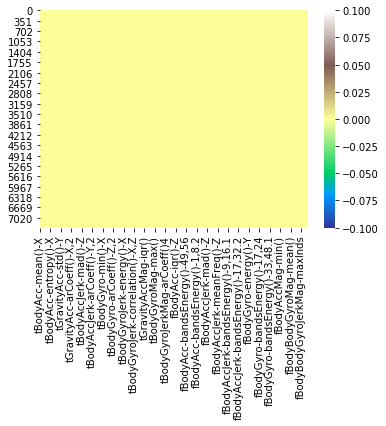

In [20]:
sns.heatmap(train.isnull(),cbar=True,cmap='terrain')

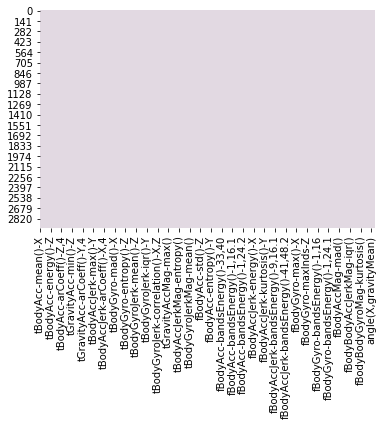

In [21]:
sns.heatmap(test.isnull(),cbar=False,cmap= 'twilight')

In [22]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing


<b>Figure of the Activity Levels</b>

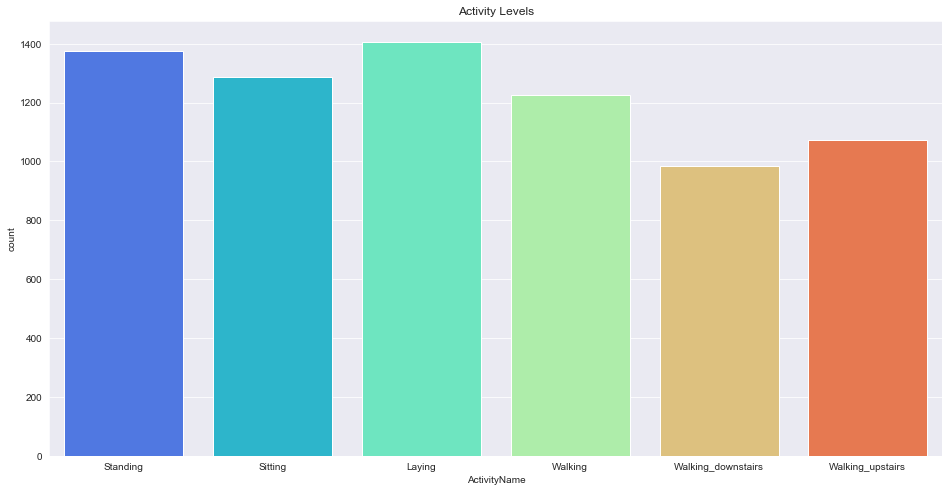

In [23]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.countplot(x='ActivityName',data=train,palette='rainbow')
plt.title('Activity Levels')
plt.show()

<b>Figure of the Activity Levels of each person</b>

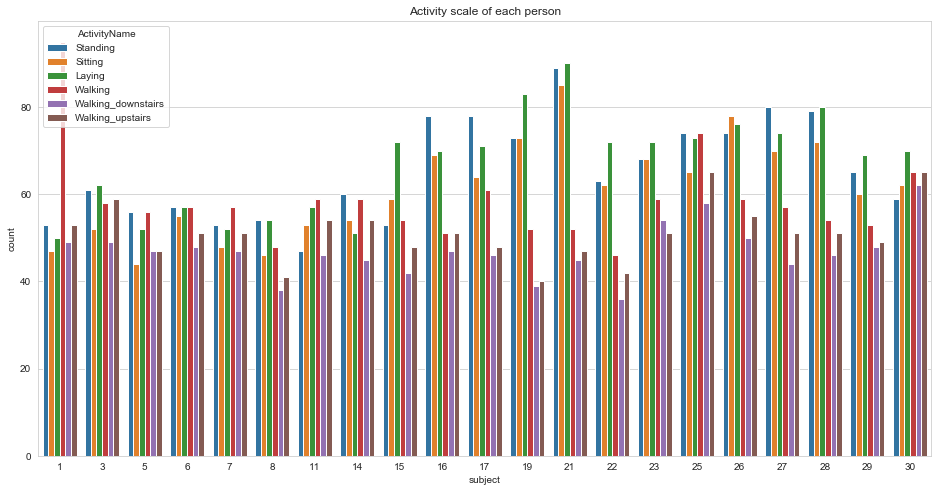

In [24]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.countplot(x='subject',data=train,hue='ActivityName')
plt.title('Activity scale of each person')
plt.show()

<b>Setting up the X_train and X_test data</b>

In [25]:
X_train.drop(['subject','Activity','ActivityName'],axis=1,inplace=True)

In [26]:
X_test.drop(['subject','Activity','ActivityName'],axis=1,inplace=True)

# Applying Algorithms

<b>1-Random Forest Classifier </b>

In [27]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier().fit(X_train, y_train)
rcf_pred= rcf.predict(X_test)
rand_forest=pd.DataFrame({'Actual':y_test,'Predicted':rcf_pred})
rand_forest

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


<b>Actual Versus Predicted Data by Random Forest</b>

Text(0.5, 1.0, 'Actual vs Predicted')

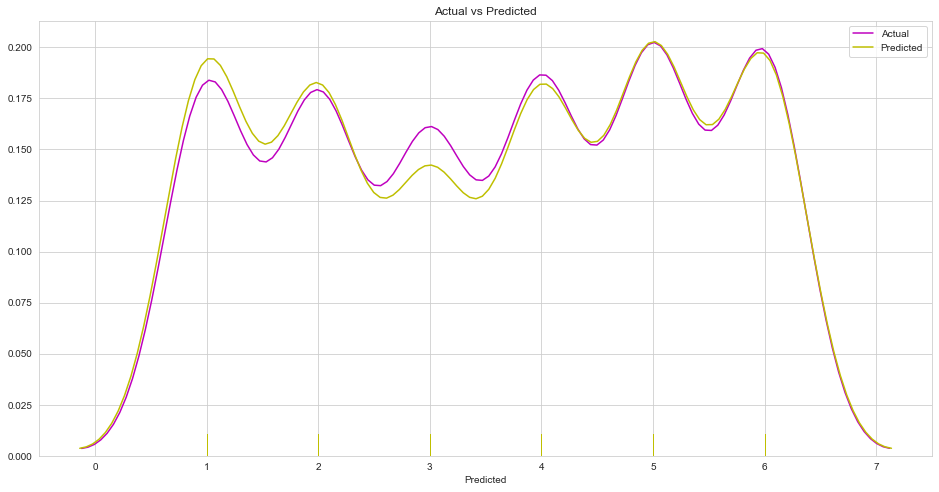

In [28]:
#sns.jointplot(x='Actual',y='Predicted',data=rand_forest,kind='kde',color='b')
plt.figure(figsize=(16,8))
sns.distplot(rand_forest['Actual'], color='m',label='Actual',hist=False,rug=True) 
sns.distplot(rand_forest['Predicted'], color='y',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy Score of Random Forest Classifier</b>

In [29]:
rcf_score=metrics.accuracy_score(y_test,rcf_pred)
rcf_score

0.9280624363759755

<b>2-Support Vector Classifier</b>

In [30]:
from sklearn.svm import SVC
svc=SVC().fit(X_train, y_train)
svc_pred= svc.predict(X_test)
svc_frame=pd.DataFrame({'Actual':y_test,'Predicted':svc_pred})
svc_frame

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


<b>Actual Versus Predicted Data by Support Vector Classifier</b>

Text(0.5, 1.0, 'Actual vs Predicted')

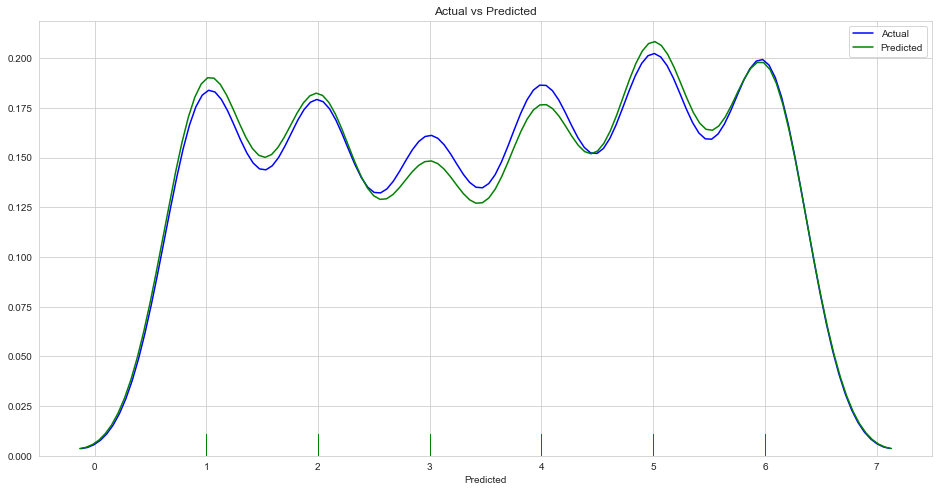

In [31]:
#sns.jointplot(x='Actual',y='Predicted',data=svc_frame,kind='reg',color='k')
plt.figure(figsize=(16,8))
sns.distplot(svc_frame['Actual'], color='b',label='Actual',hist=False,rug=True) 
sns.distplot(svc_frame['Predicted'], color='g',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy Score of Support Vector Classifier</b>

In [32]:
svc_score=metrics.accuracy_score(y_test,svc_pred)
svc_score

0.9504580929759077

<b>3-K-Neighbors Classifier</b>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_pred= knn.predict(X_test)
knn_frame=pd.DataFrame({'Actual':y_test,'Predicted':knn_pred})
knn_frame

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,4


<b>Actual Versus Predicted Data by K-Neighbors Classifier</b>

Text(0.5, 1.0, 'Actual vs Predicted')

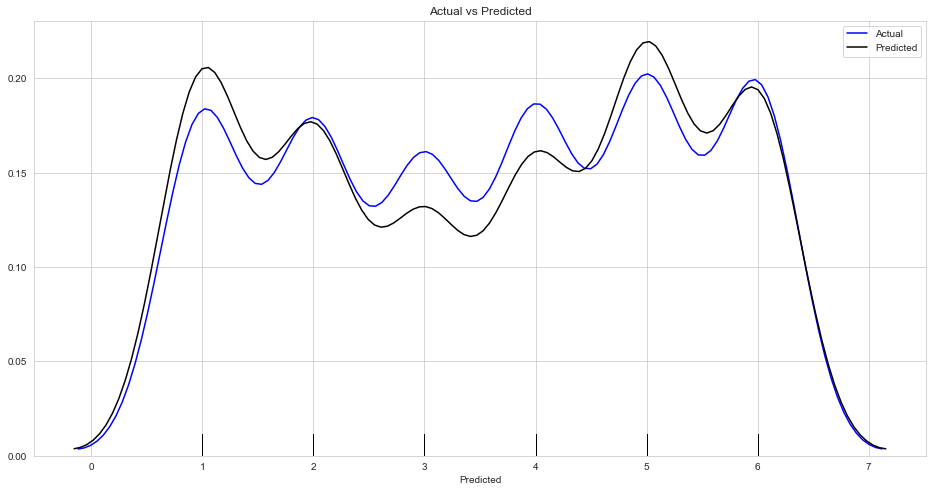

In [34]:
#sns.jointplot(x='Actual',y='Predicted',data=knn_frame,kind='kde',color='y')
plt.figure(figsize=(16,8))
sns.distplot(knn_frame['Actual'], color='blue',label='Actual',hist=False,rug=True) 
sns.distplot(knn_frame['Predicted'], color='black',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy Score of K-Neighbors Classifier</b>

In [35]:
knn_score=metrics.accuracy_score(y_test,knn_pred)
knn_score

0.9015948422124194

<b>4-Gaussian Naive Bayes</b>

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(X_train, y_train)
gnb_pred= gnb.predict(X_test)
gnb_frame=pd.DataFrame({'Actual':y_test,'Predicted':gnb_pred})
gnb_frame

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,4
9,5,4


<b>Actual Versus Predicted Data by Gaussian Naive Bayes</b>

Text(0.5, 1.0, 'Actual vs Predicted')

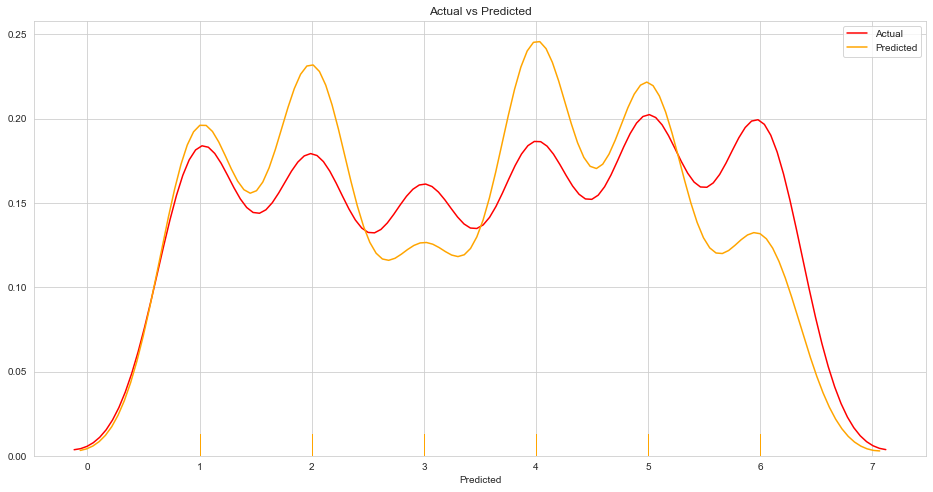

In [37]:
#sns.jointplot(x='Actual',y='Predicted',data=gnb_frame,kind='kde',color='r')
plt.figure(figsize=(16,8))
sns.distplot(gnb_frame['Actual'], color='r',label='Actual',hist=False,rug=True) 
sns.distplot(gnb_frame['Predicted'], color='orange',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy Score of Gaussian Naive Bayes</b>

In [38]:
gnb_score=metrics.accuracy_score(y_test,gnb_pred)
gnb_score

0.7702748557855447

<b>5-Logistic Reression</b>

In [39]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_frame=pd.DataFrame({'Actual':y_test,'Predicted':lr_pred})
lr_frame

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


<b>Actual Versus Predicted Data by Logistic Regression</b>

Text(0.5, 1.0, 'Actual vs Predicted')

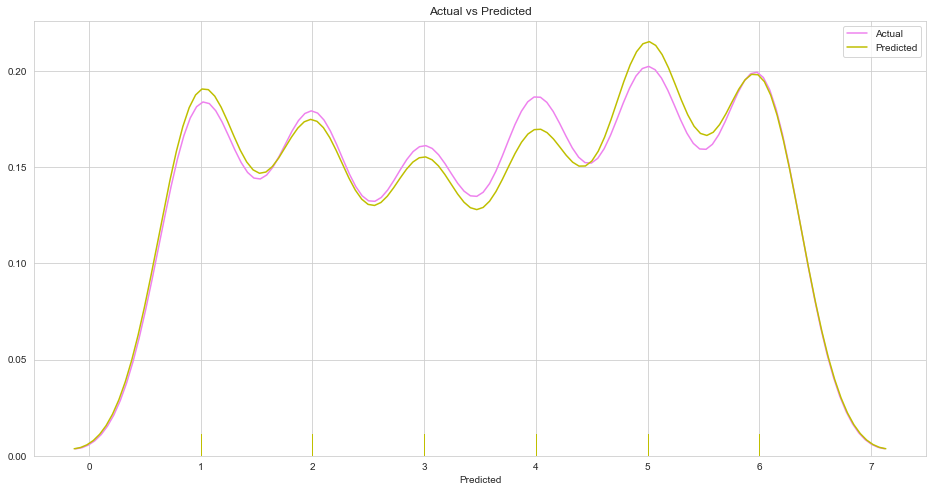

In [40]:
#sns.jointplot(x='Actual',y='Predicted',data=lr_frame,kind='kde',color='g')
plt.figure(figsize=(16,8))
sns.distplot(lr_frame['Actual'], color='violet',label='Actual',hist=False,rug=True) 
sns.distplot(lr_frame['Predicted'], color='y',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy Score of Logistic Regression</b>

In [41]:
lr_score=metrics.accuracy_score(y_test,lr_pred)
lr_score

0.9579233118425518

<b>6-DecisionTreeClassifier</b>

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_frame = pd.DataFrame({'Actual':y_test,'Predicted':dtree_pred})
dtree_frame

,Actual,Predicted
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,4
7,5,5
8,5,5
9,5,5


<b>Actual versus predicted data by DecisionTreeClassifier</b>

Text(0.5, 1.0, 'Actual vs Predicted')

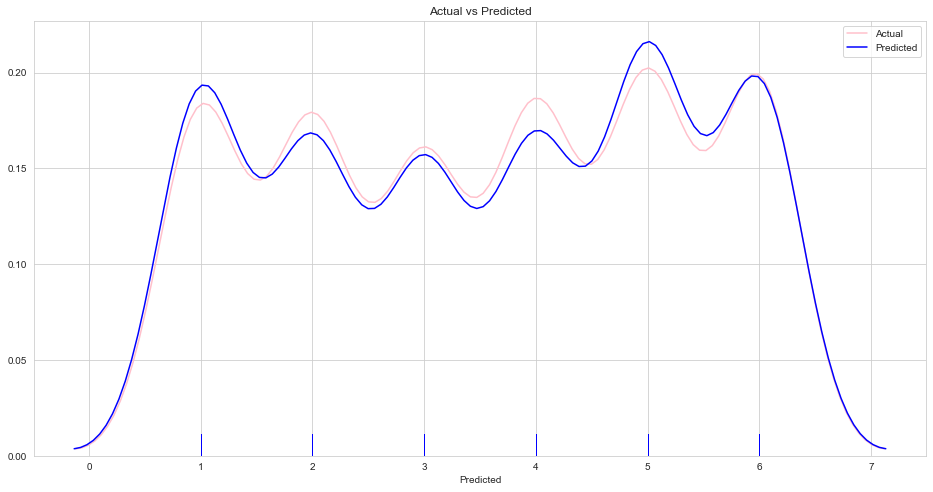

In [43]:
plt.figure(figsize=(16,8))
sns.distplot(dtree_frame['Actual'], color='pink',label='Actual',hist=False,rug=True) 
sns.distplot(dtree_frame['Predicted'], color='blue',label='Predicted',hist=False,rug=True) 
plt.title('Actual vs Predicted')

<b>Accuracy score of Decision Tree Classifier</b>

In [44]:
dtree_score=metrics.accuracy_score(y_test,dtree_pred)
dtree_score

0.8554462164913471

<b>Comparing the scores of each algorithm to find the best one.</b>

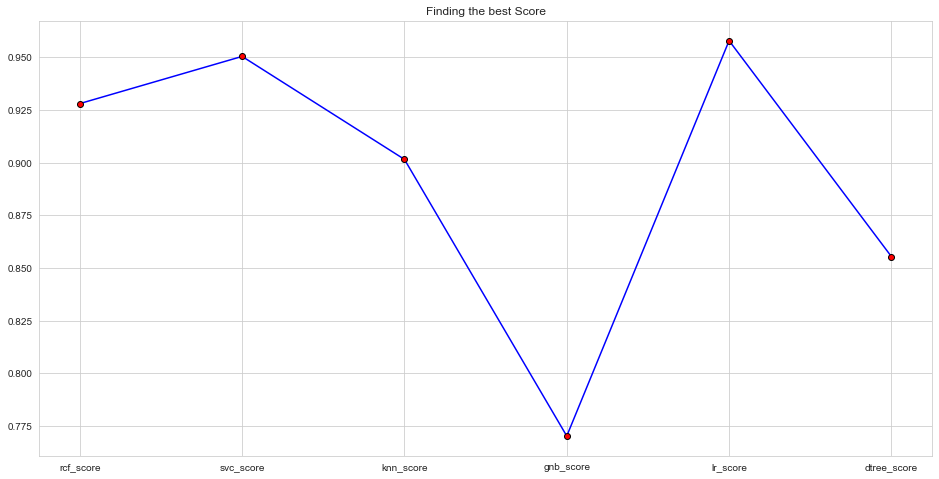

In [46]:
plt.figure(figsize=(16,8))
scores=[rcf_score,svc_score,knn_score,gnb_score,lr_score,dtree_score]
algs=['rcf_score','svc_score','knn_score','gnb_score','lr_score','dtree_score']
plt.plot(algs,scores,marker='o',color='b',markerfacecolor='red',markeredgecolor='black')
plt.title('Finding the best Score')
plt.grid(True)